# Week 2: Jumping in with data

## Overview

* We continue with our "quick start" approach.
* Today we focus on grabbing some data and doing simple operations and visualisations.
* We'll introduce `pandas` as the key package for working with (tabular) data, and `seaborn` for quickly making visualisations.
* By the end, you'll see that you can accomplish moderately sophisticated tasks with very little code!
* Of course, learning *what* code to write is harder - we will be more systematic about learning that in future weeks.

## Meet `pandas`

<div>
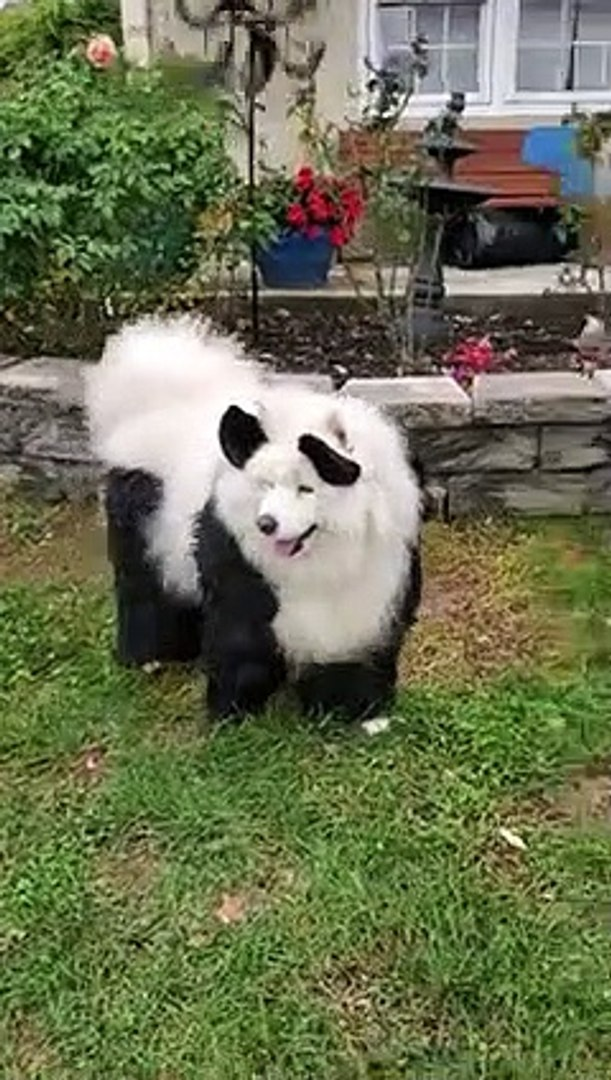
</div>

"You thought I was panda.  But I am dog.  Bamboozled you, friend!"


To use `pandas` in our notebook, we must first import it.  To save typing, we can import the package name with a useful abbreviation.  By convention, `pandas` is often imported `as pd`, which means we can write `pd.` instead of `pandas.`  Remember: Good programmers are lazy! 😀

In [2]:
import pandas as pd

We've talked about understanding and recording the versions of packages you use.  You can always check the version of a package by using the `__version__` member of a package:

In [3]:
pd.__version__

'2.0.3'

A fairly common scenario you'll face is someone will send you some data in an Excel workbook.  We'll learn later in the term that there's much better ways to store and share data.  But, nevertheless, you also have to work with data starting from the format you get it in, whether ideal or not!

The first dataset we'll look at is a time-series of programming language popularity.  This data comes from https://www.kaggle.com/datasets/muhammadkhalid/most-popular-programming-languages-since-2004, which is based on the rankings at https://pypl.github.io/PYPL.html.  I've done a few adjustments to the format of the data for purposes of illustration (but I haven't changed any of the data values themselves).

The `pandas` function to read data from an Excel workbook is `read_excel`:

In [4]:
help(pd.read_excel)

Help on function read_excel in module pandas.io.excel._base:

read_excel(io, sheet_name: 'str | int | list[IntStrT] | None' = 0, *, header: 'int | Sequence[int] | None' = 0, names: 'list[str] | None' = None, index_col: 'int | Sequence[int] | None' = None, usecols: 'int | str | Sequence[int] | Sequence[str] | Callable[[str], bool] | None' = None, dtype: 'DtypeArg | None' = None, engine: "Literal['xlrd', 'openpyxl', 'odf', 'pyxlsb'] | None" = None, converters: 'dict[str, Callable] | dict[int, Callable] | None' = None, true_values: 'Iterable[Hashable] | None' = None, false_values: 'Iterable[Hashable] | None' = None, skiprows: 'Sequence[int] | int | Callable[[int], object] | None' = None, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, parse_dates: 'list | dict | bool' = False, date_parser: 'Callable | lib.NoDefault' = <no_default>, date_format: 'dict[Hashable, str] | str | None' = None, thousands: 'str | None' 

Notice that you can read data from a file you have stored locally - or straight from the web!  To streamline the presentation, I have posted the datasets for this lecture on the web, and this notebook accesses them directly from where they're stored.  (It does mean that when you run `.read_excel()` you will need to have an Internet connection.)

A common custom is to use the variable name `df` for your `DataFrame`.  If you've only got one `DataFrame` it's a useful shorthand, if you don't want to give it a more descriptive name.

In [5]:
df = pd.read_excel("https://github.com/tturocy/eco7026a/raw/main/2022-23/pypl.xls")

In [6]:
df

,Date,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi/Pascal,Go,Groovy,...,Powershell,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,VisualBasic
0,2004-07-01,0.34,0.36,10.01,4.68,0.42,0.00,2.80,0.00,0.03,...,0.16,2.51,0.39,0.33,0.24,0.17,0.00,0.00,1.43,8.50
1,2004-08-01,0.35,0.36,9.74,4.96,0.46,0.00,2.65,0.00,0.07,...,0.15,2.62,0.40,0.40,0.19,0.17,0.00,0.00,1.45,8.51
2,2004-09-01,0.41,0.41,9.59,5.04,0.51,0.00,2.64,0.00,0.08,...,0.08,2.71,0.40,0.41,0.17,0.13,0.00,0.00,1.54,8.38
3,2004-10-01,0.40,0.38,9.47,5.29,0.53,0.00,2.76,0.00,0.09,...,0.12,2.91,0.42,0.46,0.12,0.14,0.00,0.00,1.61,8.46
4,2004-11-01,0.38,0.38,9.48,5.22,0.55,0.00,2.75,0.00,0.07,...,0.12,2.83,0.41,0.44,0.17,0.15,0.00,0.00,1.50,8.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2023-01-01,0.46,0.85,6.84,6.93,0.39,0.82,0.00,1.92,0.39,...,0.89,27.69,3.99,1.02,1.89,0.63,2.21,2.77,1.02,0.59
223,2023-02-01,0.46,0.89,6.84,6.92,0.37,0.82,0.02,1.93,0.36,...,0.87,27.42,4.09,1.03,1.95,0.62,2.27,2.80,1.01,0.58
224,2023-03-01,0.46,0.93,6.86,6.81,0.37,0.80,0.09,1.90,0.37,...,0.89,27.39,4.20,1.03,2.06,0.65,2.25,2.84,0.98,0.56
225,2023-04-01,0.46,0.95,6.73,6.82,0.39,0.81,0.13,1.96,0.33,...,0.95,27.29,4.23,1.03,2.11,0.68,2.30,2.88,0.96,0.60


We can see the type of what we've loaded is `DataFrame`, which is defined by the `pandas` package.  As we'll see, this is a quite complex and very powerful type!

In [7]:
type(df)

pandas.core.frame.DataFrame

We can get a full list of the column names:

In [8]:
df.columns

Index(['Date', 'Abap', 'Ada', 'C/C++', 'C#', 'Cobol', 'Dart', 'Delphi/Pascal',
       'Go', 'Groovy', 'Haskell', 'Java', 'JavaScript', 'Julia', 'Kotlin',
       'Lua', 'Matlab', 'Objective-C', 'Perl', 'PHP', 'Powershell', 'Python',
       'R', 'Ruby', 'Rust', 'Scala', 'Swift', 'TypeScript', 'VBA',
       'VisualBasic'],
      dtype='object')

To focus on just one column, we can access the `DataFrame` like it is a `dict` - and pass the column name we are interested in.

In [9]:
df['Python']

0       2.51
1       2.62
2       2.71
3       2.91
4       2.83
       ...  
222    27.69
223    27.42
224    27.39
225    27.29
226    27.27
Name: Python, Length: 227, dtype: float64

In the 2000s, Java was the language that it seemed everyone was using.  We might want just to look at the columns comparing Java and Python.  To do this, we can select from the columns of the `DataFrame` by passing a `list`:

In the above example, I put extra spaces around the list just to make a visual distinction for you.  More commonly we don't put extra space in, and so we would write this equivalently:

In [10]:
df[['Python', 'R', 'Java']] # 多列都用双引号

,Python,R,Java
0,2.51,0.39,30.16
1,2.62,0.40,29.80
2,2.71,0.40,29.59
3,2.91,0.42,29.02
4,2.83,0.41,29.48
...,...,...,...
222,27.69,3.99,16.63
223,27.42,4.09,16.60
224,27.39,4.20,16.42
225,27.29,4.23,16.35


Our data are imported from Excel with column labels.  By default, rows are just assigned row numbers sequentially - these are the boldface numbers 0 through 226 in the output.  In our case, it makes sense to label each row by its date.  We can do this by calling `.set_index()`:

In [11]:
df2 = df.set_index('Date') # 参数需要加‘’，否则报错(列名为变量时，不需要加‘’)
df2

,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi/Pascal,Go,Groovy,Haskell,...,Powershell,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,VisualBasic
Date,,,,,,,,,,,,,,,,,,,,,
2004-07-01,0.34,0.36,10.01,4.68,0.42,0.00,2.80,0.00,0.03,0.22,...,0.16,2.51,0.39,0.33,0.24,0.17,0.00,0.00,1.43,8.50
2004-08-01,0.35,0.36,9.74,4.96,0.46,0.00,2.65,0.00,0.07,0.20,...,0.15,2.62,0.40,0.40,0.19,0.17,0.00,0.00,1.45,8.51
2004-09-01,0.41,0.41,9.59,5.04,0.51,0.00,2.64,0.00,0.08,0.21,...,0.08,2.71,0.40,0.41,0.17,0.13,0.00,0.00,1.54,8.38
2004-10-01,0.40,0.38,9.47,5.29,0.53,0.00,2.76,0.00,0.09,0.20,...,0.12,2.91,0.42,0.46,0.12,0.14,0.00,0.00,1.61,8.46
2004-11-01,0.38,0.38,9.48,5.22,0.55,0.00,2.75,0.00,0.07,0.24,...,0.12,2.83,0.41,0.44,0.17,0.15,0.00,0.00,1.50,8.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,0.46,0.85,6.84,6.93,0.39,0.82,0.00,1.92,0.39,0.32,...,0.89,27.69,3.99,1.02,1.89,0.63,2.21,2.77,1.02,0.59
2023-02-01,0.46,0.89,6.84,6.92,0.37,0.82,0.02,1.93,0.36,0.35,...,0.87,27.42,4.09,1.03,1.95,0.62,2.27,2.80,1.01,0.58
2023-03-01,0.46,0.93,6.86,6.81,0.37,0.80,0.09,1.90,0.37,0.34,...,0.89,27.39,4.20,1.03,2.06,0.65,2.25,2.84,0.98,0.56


It is worth pausing to unpack that previous statement, because there are a few important concepts at work.

When we called `df.set_index('Date')`, what actually happens is we create a new, different `DataFrame` from the original.  The difference is that in the original `DataFrame`, there's a column called `Date`; in the new one, there isn't a column called `Date`, but the row index labels are the values taken from the original `Date` column.

That is to say, `.set_index()` - and indeed just about all of the operations we will use! - are operations that **transform** one `DataFrame` into another `DataFrame` according to some rules.

Then, in the assignment statement, we store this new version of the `DataFrame` in a new variable, which we call `df2`.

In this way, we have both the "original" `DataFrame` `df` and the "transformed" one `df2`.  We'll see that this is a very powerful technique - because when we work with our data, we can express the calculations we do as various kinds of transformations on it.  At the same time, we can keep copies of earlier versions of the data for later reference.

**NOTE:** When you do look up `pandas` examples on the Internet, you will see examples where people instead call `df.set_index('Date', inplace=True)`.  Any time you see `inplace=True` this means the function modifies the original `DataFrame`.  You should not do this.  For the moment, just don't do it; we will talk more about why in a few weeks time!

## Visualisation

To do some quick visualisation, we'll start by using the `seaborn` package.  This package is built on top of `matplotlib`, but adds lots of useful options for doing standard formatting quickly - so you can make some quite nice graphics without much effort!

**Fun fact:** The standard abbreviation for `seaborn` in Python code is `sns`.  These are the initials of Samuel Norton Seaborn, a character on the TV series *The West Wing*.

In [12]:
import seaborn as sns

The `seaborn` function `lineplot` creates a simple line plot.  The simplest way to use is to pass the columns of the `DataFrame` you want to plot.  The horizontal ($x$) axis labels are taken from the index of the `DataFrame` (which is why it was useful to set it earlier!)

<Axes: xlabel='Date'>

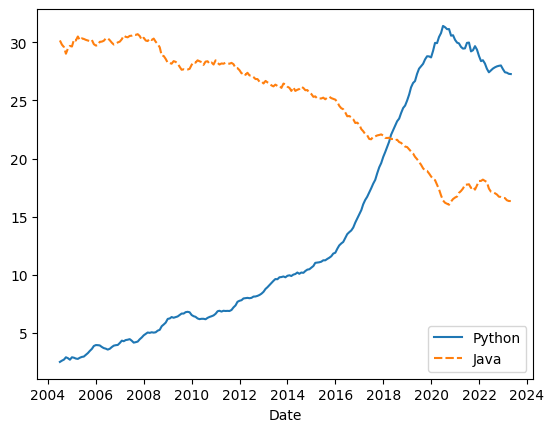

In [13]:
sns.lineplot(data=df2[['Python', 'Java']])

That's already not looking that bad!  `seaborn` offers a lot of "sensible defaults" that produce good-quality graphs.  But it's then still possible to customise them to your heart's content.  We'll delve more into these throughout the term.

Even this quick visualisation, however, has already given us some insights.  We see that Python has in fact grown - and especially took off in around 2016, and overtook Java around 2018.

Was Python's growth entirely at the expense of Java?  Let's explore that in a bit more detail, and along the way dig a bit more into details of `pandas`.

Each column in a `DataFrame` is of type `Series`.

In [14]:
type(df2['Python'])

pandas.core.series.Series

`pandas` defines operations on `Series`.  For example, we can add two `Series` together.  When we do this, what happens is that the `Series` get added **element-by-element**.  So if we want to create a `Series` which tells us the total share of Python plus Java, we can write:

In [15]:
df2['Java'] + df2['Python'] # 两列相加而非拼接,字符串只有纯字面值才能相加(不包含括号等)

Date
2004-07-01    32.67
2004-08-01    32.42
2004-09-01    32.30
2004-10-01    31.93
2004-11-01    32.31
              ...  
2023-01-01    44.32
2023-02-01    44.02
2023-03-01    43.81
2023-04-01    43.64
2023-05-01    43.62
Length: 227, dtype: float64

On the surface it looks like, no, Python's growth is not exclusively at the expense of Java, because their combined share in 2023 is higher than in 2024.  We can plot this:

In [16]:
type(df2['Java'] + df2['Python'])

pandas.core.series.Series

<Axes: xlabel='Date'>

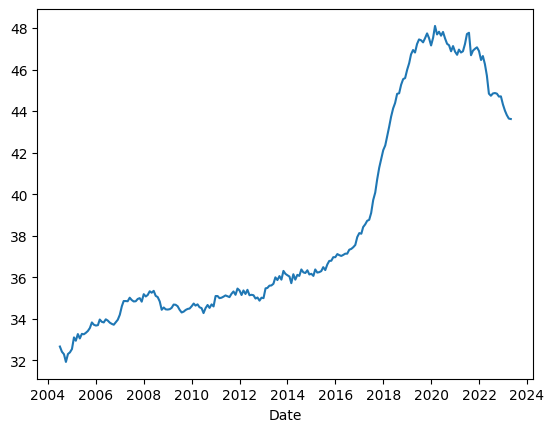

In [17]:
sns.lineplot(data=df2['Java'] + df2['Python']) 

It doesn't look like the entire story is simply Python replacing Java.  The combined share of the two languages increased from 2004 to 2020, and then since has fallen slightly.  Can we try to figure out a bit more about where Python's growth came from - and about this downturn since 2020?

`pandas` is fairly clever - it was able to import our `Date` column as dates, rather than just strings of text.  So as we saw last week, we can use Python's `datetime` objects to represent dates and work with the observations in our DataFrame.

In [18]:
import datetime

We can use `.loc` to access one row (observation) of our DataFrame.  Here's an example where the way we use row labels (the index) differently from column labels; the row index requires using `.loc[]` while columns just use `[]`.

**QUESTION FOR DISCUSSION**: Why do you think this is?  Why have column access require less typing?  What does that tell you about how `DataFrame` are used?

In [19]:
df2.loc[datetime.datetime(2023, 1, 1)]

Abap              0.46
Ada               0.85
C/C++             6.84
C#                6.93
Cobol             0.39
Dart              0.82
Delphi/Pascal     0.00
Go                1.92
Groovy            0.39
Haskell           0.32
Java             16.63
JavaScript        9.55
Julia             0.39
Kotlin            1.80
Lua               0.58
Matlab            1.63
Objective-C       2.19
Perl              0.35
PHP               5.24
Powershell        0.89
Python           27.69
R                 3.99
Ruby              1.02
Rust              1.89
Scala             0.63
Swift             2.21
TypeScript        2.77
VBA               1.02
VisualBasic       0.59
Name: 2023-01-01 00:00:00, dtype: float64

Each row is itself a `Series`.  And therefore, we can do math operations on the series!  So for example, if we wanted to look at the change in popularity in all languages between the start of 2016 and the start of 2020, we can do this:

In [20]:
df2.loc[datetime.datetime(2020, 1, 1)] - df2.loc[datetime.datetime(2016, 1, 1)]

Abap              0.01
Ada              -0.01
C/C++            -1.90
C#               -1.85
Cobol             0.01
Dart              0.31
Delphi/Pascal    -0.33
Go                1.12
Groovy            0.10
Haskell           0.04
Java             -6.61
JavaScript        0.38
Julia             0.11
Kotlin            1.50
Lua              -0.22
Matlab           -1.08
Objective-C      -3.07
Perl             -0.53
PHP              -4.96
Powershell        0.43
Python           16.80
R                 0.69
Ruby             -1.07
Rust              0.45
Scala             0.12
Swift            -0.73
TypeScript        1.49
VBA              -0.19
VisualBasic      -1.02
dtype: float64

Hmm, interesting!  In that span, after Java, the language which lost the most ground was PHP.  So it might be worth adding PHP to our analysis and graph.  But are there other languages which are worth considering?  We can use the `.describe()` operation on our `DataFrame` to get summary statistics for each column:

In [21]:
df2.describe()

,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi/Pascal,Go,Groovy,Haskell,...,Powershell,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,VisualBasic
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,...,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,0.489692,0.361542,8.113348,7.496784,0.368194,0.176608,0.960661,0.476344,0.343128,0.292952,...,0.650088,13.558106,2.310396,1.986872,0.362599,0.582687,1.192203,0.679868,1.606256,3.378414
std,0.107508,0.198476,1.774062,1.232928,0.072104,0.239022,0.770689,0.605488,0.142274,0.043371,...,0.345986,9.638546,1.406341,0.742304,0.456221,0.405719,1.330639,0.869228,0.365879,2.281362
min,0.320000,0.090000,5.480000,4.680000,0.180000,0.000000,0.000000,0.000000,0.030000,0.200000,...,0.010000,2.510000,0.380000,0.330000,0.020000,0.020000,0.000000,0.000000,0.860000,0.530000
25%,0.400000,0.220000,6.800000,6.640000,0.320000,0.000000,0.290000,0.030000,0.285000,0.260000,...,0.330000,6.215000,1.000000,1.350000,0.070000,0.180000,0.000000,0.020000,1.390000,1.140000
50%,0.480000,0.320000,7.940000,7.200000,0.360000,0.090000,0.700000,0.090000,0.380000,0.290000,...,0.740000,9.860000,2.120000,2.290000,0.160000,0.560000,0.000000,0.110000,1.550000,3.020000
75%,0.560000,0.390000,8.675000,8.440000,0.405000,0.180000,1.625000,0.885000,0.440000,0.330000,...,0.910000,23.325000,3.795000,2.620000,0.405000,0.965000,2.380000,1.480000,1.730000,5.325000
max,0.760000,1.020000,12.890000,9.940000,0.560000,0.880000,2.800000,2.130000,0.570000,0.390000,...,1.260000,31.410000,4.600000,2.940000,2.110000,1.350000,3.530000,2.880000,2.620000,8.510000


From the columns that are shown, we can see that a lot of the languages included in the dataset never really have significant popularity, so they won't show up well on a graph and certainly aren't relevant to understading our question.  We're probably mostly interested in looking at languages which had substantial popularity at least at some point during the sample.  We can just get the maximum of each column by calling `.max()` on our `DataFrame`:

In [22]:
df2.max()

Abap              0.76
Ada               1.02
C/C++            12.89
C#                9.94
Cobol             0.56
Dart              0.88
Delphi/Pascal     2.80
Go                2.13
Groovy            0.57
Haskell           0.39
Java             30.70
JavaScript        9.66
Julia             0.53
Kotlin            1.85
Lua               0.72
Matlab            3.45
Objective-C       6.88
Perl              7.33
PHP              20.74
Powershell        1.26
Python           31.41
R                 4.60
Ruby              2.94
Rust              2.11
Scala             1.35
Swift             3.53
TypeScript        2.88
VBA               2.62
VisualBasic       8.51
dtype: float64

Because we're looking for the largest values, it's useful to sort them.  We can do that by applying the `.sort_values()` operation to the `Series` that results from `.max()`.

In [23]:
df2.max().sort_values()

Haskell           0.39
Julia             0.53
Cobol             0.56
Groovy            0.57
Lua               0.72
Abap              0.76
Dart              0.88
Ada               1.02
Powershell        1.26
Scala             1.35
Kotlin            1.85
Rust              2.11
Go                2.13
VBA               2.62
Delphi/Pascal     2.80
TypeScript        2.88
Ruby              2.94
Matlab            3.45
Swift             3.53
R                 4.60
Objective-C       6.88
Perl              7.33
VisualBasic       8.51
JavaScript        9.66
C#                9.94
C/C++            12.89
PHP              20.74
Java             30.70
Python           31.41
dtype: float64

Sorting always defaults to ascending order - which sometimes with numerical data may not be most convenient.  You can sort the other way:

In [24]:
df2.max().sort_values(ascending=False)

Python           31.41
Java             30.70
PHP              20.74
C/C++            12.89
C#                9.94
JavaScript        9.66
VisualBasic       8.51
Perl              7.33
Objective-C       6.88
R                 4.60
Swift             3.53
Matlab            3.45
Ruby              2.94
TypeScript        2.88
Delphi/Pascal     2.80
VBA               2.62
Go                2.13
Rust              2.11
Kotlin            1.85
Scala             1.35
Powershell        1.26
Ada               1.02
Dart              0.88
Abap              0.76
Lua               0.72
Groovy            0.57
Cobol             0.56
Julia             0.53
Haskell           0.39
dtype: float64

Maybe you only care about the top 5.  We can filter the output by applying the `.head()` operation:

In [25]:
df2.max().sort_values(ascending=False).head(5)

Python    31.41
Java      30.70
PHP       20.74
C/C++     12.89
C#         9.94
dtype: float64

Let's unpack what the above has just done, because there's an important concept here.  What this code says is to do the following:
* Take our `DataFrame` `df2`
* Find the maximum value for each column (produces a `Series`)
* Take that `Series` and sort the values in descending order; this produces another `Series`
* Take *that* `Series` and restrict it only to the first 5 entries.
The important concept to take away is that when we work with data, we can express what we are doing via a set of standard operations.  By putting those operations together in an appropriate order, we can accomplish any transformation of our data we so desire!

In terms of syntax, because each of our operations returns a `Series` and then the next one takes a `Series`, we can combine our operations by separating them with the `.` operator.  We could write them like this:

```
maxes = df2.max()
sorted_maxes = maxes.sort_values(ascending=False)
filtered_maxes = sorted_maxes.head(5)
```

However, putting them all in one expression lets us avoid having to name intermediate outputs we are not interested in.

This style of programming is called *method chaining* or a *fluent interface*.  It takes a bit of getting used to reading, but once you get the hang of it, it is a very concise way of expressing the transformations you are doing on your data.

Back to the task at hand!  The calculation above suggests that we can probably restrict attention to the four languages which reached at least 10% popularity at some point during the sample.  So let's re-do our graph accordingly.

<Axes: xlabel='Date'>

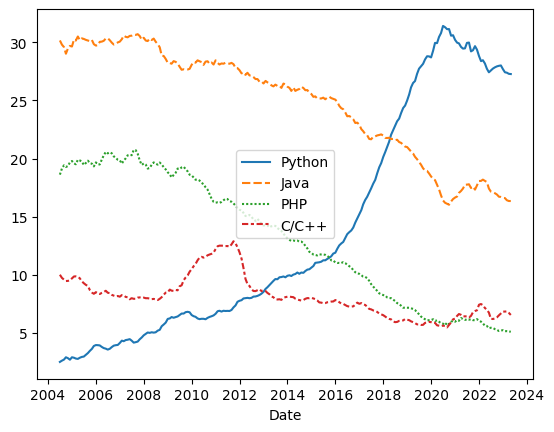

In [26]:
sns.lineplot(df2[['Python', 'Java', 'PHP', 'C/C++']])

**EXERCISE**: The downturn in Python since 2020 isn't because Java or PHP have seen a resurgence; in fact they've gone down in popularity as well.  Is there another single language that looks like it is starting to take off since 2020?  Write an appropriate comparison to try to answer the question!

In [27]:
...

Ellipsis

## All aboard!

<div>
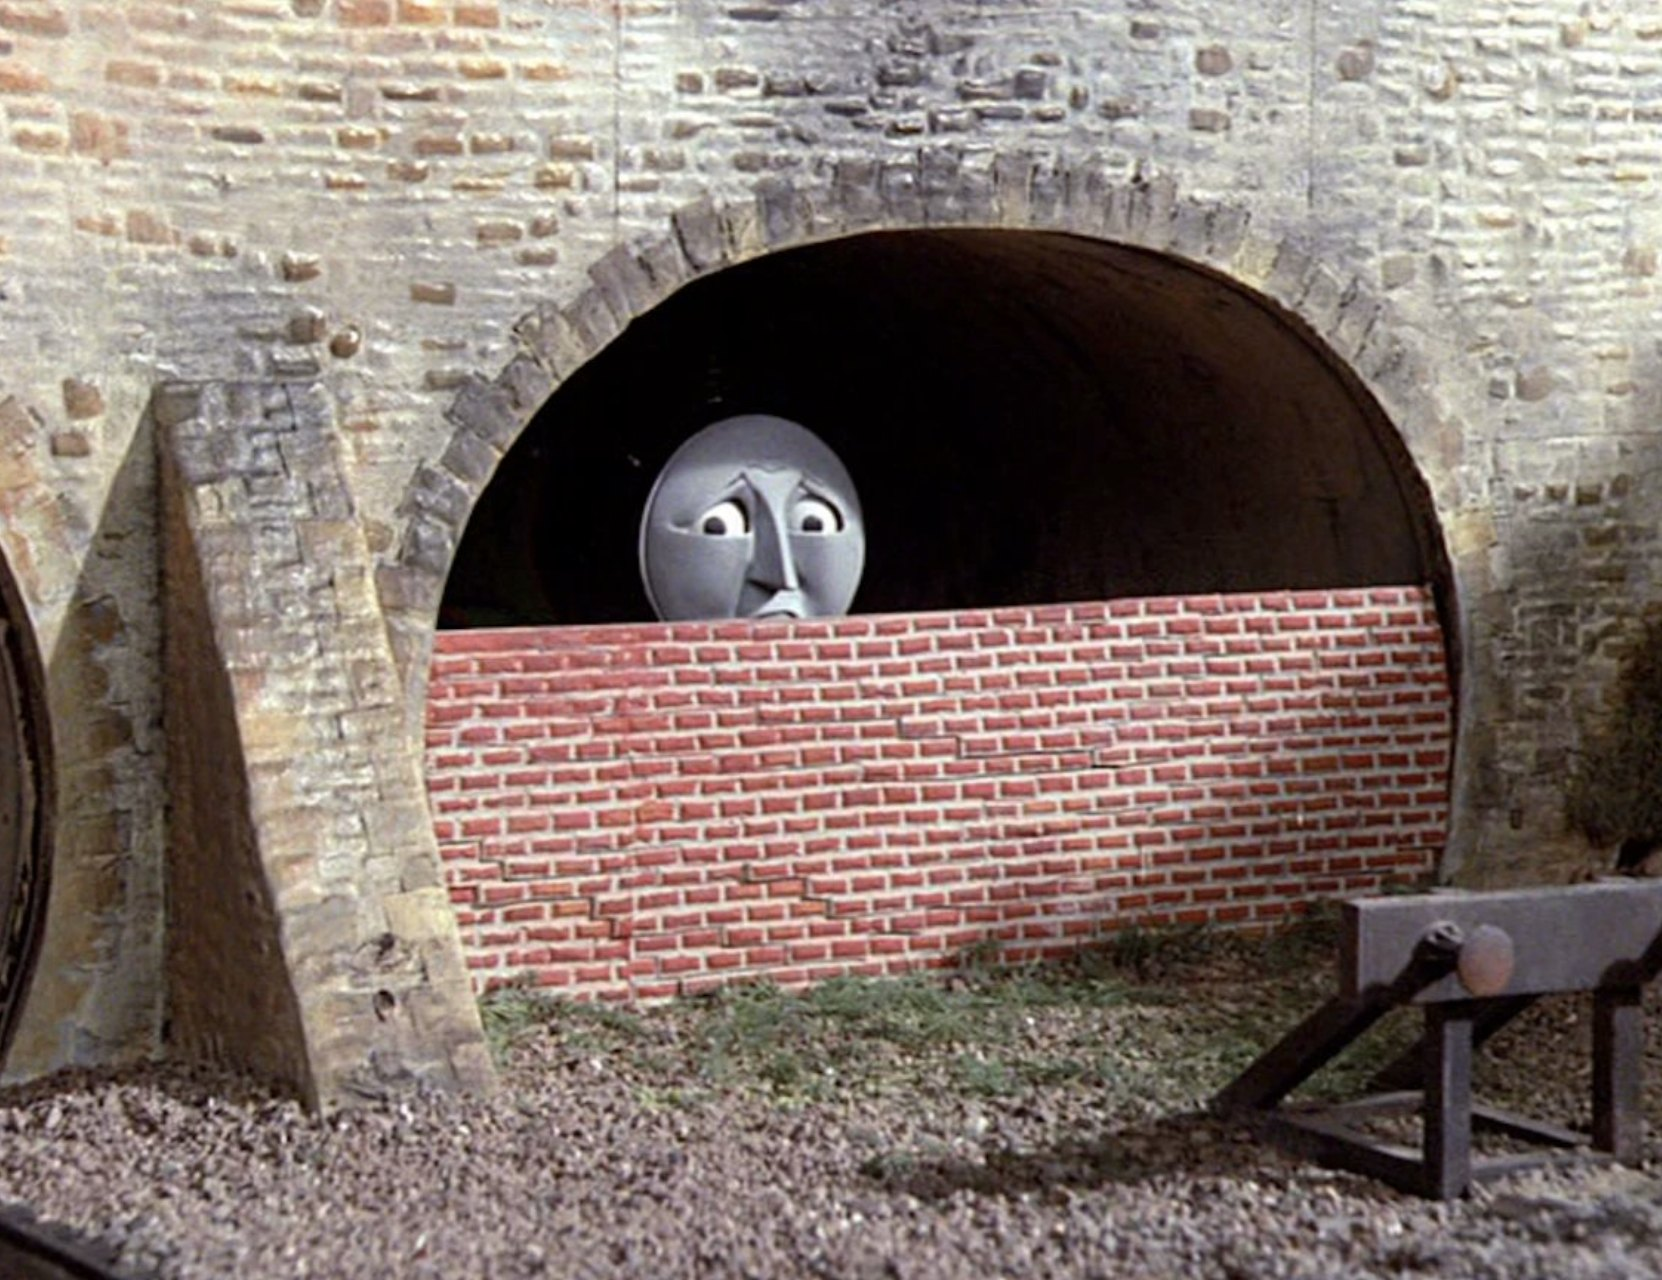
</div>

We all love trains.  (Don't we?)  Passenger trains are certainly an important part of transport policy in many countries, including the UK.  We also know that train ridership was enforced to be low during the pandemic - and that since then people have been commuting less to offices.  How do recent train ridership numbers compare to pre-pandemic levels?

The data for this exercise come from https://www.gov.uk/government/statistical-data-sets/rai02-capacity-and-overcrowding.  These provide passenger counts and capacity (seats) for trains into and out of city-centre stations for various cities, on a "typical autumn weekday".

I have done some organisation of the data to make it a bit easier to work with for our purposes.  The type of data cleaning I've done is what we will learn more about later in the module - but I did not want to let it get in our way when we are just starting out!
The data come as an Excel workbook, and I've kept it in that format.

In [28]:
trains = pd.read_excel("https://github.com/tturocy/eco7026a/raw/main/2022-23/choochoo.xls")
trains

,Year,Direction,City,Metric,start-06:59,07:00-07:59,08:00-08:59,09:00-09:59,10:00-10:59,11:00-11:59,...,15:00-15:59,16:00-16:59,17:00-17:59,18:00-18:59,19:00-19:59,20:00-20:59,21:00-21:59,22:00-22:59,23:00-end,Total
0,2011,Arrivals,Birmingham,Passengers,1921.622008,8891.293852,17954.405926,8927.662625,8291.055385,6921.543045,...,5698.319471,7269.043282,7756.831465,6777.523570,4601.058504,2775.650277,1833.665166,1088.566417,801.283183,108545.829145
1,2011,Arrivals,Birmingham,Total seats,8207.000000,12308.000000,19013.000000,15671.000000,15938.000000,14765.000000,...,15396.000000,15629.000000,16039.000000,14159.000000,14642.000000,11934.000000,11223.000000,10307.000000,9116.000000,249138.000000
2,2011,Arrivals,Bristol,Passengers,368.473600,2164.754697,3574.623163,2183.507768,1330.965316,1648.521212,...,1319.951109,1586.607517,2669.386433,2005.635842,1208.412911,946.922487,836.926646,465.619608,417.293044,26169.159375
3,2011,Arrivals,Bristol,Total seats,1338.600000,3610.000000,4688.000000,4779.000000,3410.000000,3999.000000,...,3994.000000,3127.000000,4809.000000,3752.000000,4068.000000,3246.000000,3136.000000,3460.800000,2967.600000,65242.000000
4,2011,Arrivals,Cardiff,Passengers,671.618881,2728.215000,5573.884470,2678.933333,2423.416667,1848.300000,...,1683.238095,2373.673737,2802.380830,2329.546320,1156.415873,724.191667,613.506731,488.250000,573.104545,33119.268632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,2022,Departures,Nottingham,Total seats,1387.000000,2040.000000,2372.000000,1603.000000,2158.000000,1903.000000,...,1611.000000,2232.000000,1688.000000,1869.000000,2298.000000,2251.000000,1830.000000,976.000000,1569.000000,33843.000000
592,2022,Departures,Reading,Passengers,2952.971442,6663.016499,6781.035115,5303.355409,5207.456781,5768.243220,...,5668.995285,6759.887468,7037.831253,6439.224184,6113.974288,3381.560915,2779.678519,1918.062755,1419.037647,87290.266492
593,2022,Departures,Reading,Total seats,19724.000000,18114.000000,17949.000000,15954.000000,15709.000000,16491.000000,...,16201.000000,16553.000000,16614.000000,15223.000000,15696.000000,11242.000000,11424.000000,9106.000000,9470.000000,271429.000000
594,2022,Departures,Sheffield,Passengers,939.827792,1667.881418,1391.140728,1548.141458,1687.115113,1258.604262,...,2011.144113,2105.158669,2217.020974,1845.165088,1559.095430,1195.971196,741.140910,625.836681,258.248223,25629.646249


What's in the dataset?  One useful attribute of a DataFrame is `.dtypes`.  This gives us a list (actually a Series!) of all of the columns and the type of data in the column.

In [29]:
trains.dtypes

Year             int64
Direction       object
City            object
Metric          object
start-06:59    float64
07:00-07:59    float64
08:00-08:59    float64
09:00-09:59    float64
10:00-10:59    float64
11:00-11:59    float64
12:00-12:59    float64
13:00-13:59    float64
14:00-14:59    float64
15:00-15:59    float64
16:00-16:59    float64
17:00-17:59    float64
18:00-18:59    float64
19:00-19:59    float64
20:00-20:59    float64
21:00-21:59    float64
22:00-22:59    float64
23:00-end      float64
Total          float64
dtype: object

We see we have `Year` which is an integer, and various time intervals with floating-point numbers - these will be the passenger and capacity counts.  (Because they are averages, it makes sense for them to be floating-point numbers rather than integers.)  Three columns are type `object` - this means they are of some other data type.  Usually these are strings, as we will see is the case here.

A quite handy way to get a first glimpse into columns with string data is to use `.value_counts()`.  This gives a Series which lists each of the values which appears in the column, and the number of rows in which it appears.

So for example, what does the "Direction" column mean?

In [30]:
trains['Direction'].value_counts()

Direction
Arrivals      298
Departures    298
Name: count, dtype: int64

Aha, inbound and outbound.  What about "Metric"?

In [31]:
trains['Metric'].value_counts()

Metric
Passengers     298
Total seats    298
Name: count, dtype: int64

We see that there's two kinds of data - passenger counts and total seats (capacity).  Each type of data gets its own row.

**EXERCISE**: What cities are covered?  How many rows does each city appear in?

In [32]:
...

Ellipsis

Interesting.  Most cities have 48 rows, but London has 44 and three cities have only 24.  So we've only got partial data for some cities - we'll need to be mindful of that in our analysis!

A first guess might be that what's happened is that Brighton, Cambridge, and Reading either start or stop at some point in the dataset.  We'd like to know what years we have for each city.

We've seen before that you can take the maximum overall of a column with `.max()`.  But, we'd like to know the latest year **per city**.  That is, we want to group the records by city name, and then for each of those groups, we want to find the maximum year.  Here's how that looks like in `pandas`:

In [33]:
trains.groupby('City')['Year'].max()

City
Birmingham    2022
Brighton      2022
Bristol       2022
Cambridge     2022
Cardiff       2022
Leeds         2022
Leicester     2022
Liverpool     2022
London        2021
Manchester    2022
Newcastle     2022
Nottingham    2022
Reading       2022
Sheffield     2022
Name: Year, dtype: int64

So all the cities end in 2022, except London only goes through 2021.  What about the first year for each city?

In [34]:
trains.groupby('City')['Year'].min()

City
Birmingham    2011
Brighton      2017
Bristol       2011
Cambridge     2017
Cardiff       2011
Leeds         2011
Leicester     2011
Liverpool     2011
London        2011
Manchester    2011
Newcastle     2011
Nottingham    2011
Reading       2017
Sheffield     2011
Name: Year, dtype: int64

So we see that the reason we have fewer observations for Brighton, Cambridge, and Reading is their data series start only in 2017.

**EXERCISE**: It would be even easier to spot the late entrants if the Series above were sorted.  How would you accomplish that?

In [35]:
...

Ellipsis

For the moment, let's focus on passenger numbers, rather than capacity.  To do this we'd like to take the subset of the rows which correspond to passenger counts.  These are the ones where the Metric column is equal to "Passengers".

We know `==` is used in Python for testing equality.  But we want to check equality for each of the rows in the Metric Series.  Good news - equality `==` can be tested on a Series in just one line!

In [36]:
trains['Metric'] == "Passengers"

0       True
1      False
2       True
3      False
4       True
       ...  
591    False
592     True
593    False
594     True
595    False
Name: Metric, Length: 596, dtype: bool

The above gives us a Series of type `bool` (that is, `True` and `False`) values.  To keep just the rows which correspond to the passengers metric, we can write

In [37]:
trains[trains['Metric'] == "Passengers"]

,Year,Direction,City,Metric,start-06:59,07:00-07:59,08:00-08:59,09:00-09:59,10:00-10:59,11:00-11:59,...,15:00-15:59,16:00-16:59,17:00-17:59,18:00-18:59,19:00-19:59,20:00-20:59,21:00-21:59,22:00-22:59,23:00-end,Total
0,2011,Arrivals,Birmingham,Passengers,1921.622008,8891.293852,17954.405926,8927.662625,8291.055385,6921.543045,...,5698.319471,7269.043282,7756.831465,6777.523570,4601.058504,2775.650277,1833.665166,1088.566417,801.283183,108545.829145
2,2011,Arrivals,Bristol,Passengers,368.473600,2164.754697,3574.623163,2183.507768,1330.965316,1648.521212,...,1319.951109,1586.607517,2669.386433,2005.635842,1208.412911,946.922487,836.926646,465.619608,417.293044,26169.159375
4,2011,Arrivals,Cardiff,Passengers,671.618881,2728.215000,5573.884470,2678.933333,2423.416667,1848.300000,...,1683.238095,2373.673737,2802.380830,2329.546320,1156.415873,724.191667,613.506731,488.250000,573.104545,33119.268632
6,2011,Arrivals,Leeds,Passengers,1492.095019,6086.187497,11842.008582,5334.143799,4232.089580,3660.420400,...,2976.742273,3944.464249,4971.063120,3978.904117,2624.336320,1747.783479,1202.548077,881.850000,1017.948445,64840.826619
8,2011,Arrivals,Leicester,Passengers,373.042184,1364.720031,2323.742568,1664.538731,1619.239226,1417.244186,...,1625.394343,1881.706432,2132.463886,1913.625617,1718.945245,1005.368095,1083.352668,357.811370,602.183592,24968.495970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,2022,Departures,Manchester,Passengers,2818.596458,3415.995459,4307.159861,3985.906649,3988.634994,4898.450306,...,6182.247620,7940.410367,9517.722503,5811.035404,4120.348029,3220.379191,2503.297530,2117.086893,1786.903676,80422.165133
588,2022,Departures,Newcastle,Passengers,622.599899,1254.462842,1300.027333,1646.712638,1675.101378,1846.830028,...,1754.431277,2280.449085,1903.753695,1382.021738,1032.072181,1000.654942,716.470806,290.750194,0.000000,24426.166959
590,2022,Departures,Nottingham,Passengers,116.750000,318.800000,692.166667,336.533333,980.385714,709.416667,...,592.554131,1244.041667,1183.944444,1816.658333,1435.923810,965.142857,442.200000,252.366667,325.333333,13445.682306
592,2022,Departures,Reading,Passengers,2952.971442,6663.016499,6781.035115,5303.355409,5207.456781,5768.243220,...,5668.995285,6759.887468,7037.831253,6439.224184,6113.974288,3381.560915,2779.678519,1918.062755,1419.037647,87290.266492


We'll want to refer to this a lot, so it's useful to give this subset of our data a name.  That's exactly what a Python variable is for!

In [38]:
passengers = trains[(trains['Metric'] == "Passengers")&(trains['Direction'] == "Arrivals") & (trains['Year'] == 2021)]
passengers

,Year,Direction,City,Metric,start-06:59,07:00-07:59,08:00-08:59,09:00-09:59,10:00-10:59,11:00-11:59,...,15:00-15:59,16:00-16:59,17:00-17:59,18:00-18:59,19:00-19:59,20:00-20:59,21:00-21:59,22:00-22:59,23:00-end,Total
488,2021,Arrivals,Birmingham,Passengers,1669.666667,5862.809524,9929.615019,5793.450000,4370.565385,4655.027692,...,4028.383333,5332.161905,5688.583333,4730.279121,3340.054986,2282.653221,1354.261905,1036.736364,1003.070588,73874.244042
490,2021,Arrivals,Brighton,Passengers,493.000000,1114.000000,1937.000000,1264.000000,1232.000000,1060.000000,...,1090.000000,1528.000000,1723.000000,1883.000000,1175.000000,994.000000,630.000000,602.000000,1089.000000,21092.083333
492,2021,Arrivals,Bristol,Passengers,322.365000,947.197114,2779.926288,1019.119841,1025.716162,1386.179829,...,1291.117244,1546.698138,1933.760714,909.502814,847.894017,772.802997,756.414015,288.099155,659.658333,19946.594985
494,2021,Arrivals,Cambridge,Passengers,520.000000,1444.000000,2774.000000,1631.000000,1099.000000,1055.000000,...,748.000000,1070.000000,1275.000000,1228.000000,1159.000000,869.000000,628.000000,513.000000,758.000000,19302.000000
496,2021,Arrivals,Cardiff,Passengers,1050.574908,1262.371429,2613.968487,1470.573810,1847.666941,1722.270647,...,2400.230245,2746.865476,2915.857937,2098.482143,1436.320746,1474.964977,1279.908333,645.383333,295.491667,30505.338926
498,2021,Arrivals,Leeds,Passengers,766.840784,3311.633514,6145.398468,3096.605448,3125.306942,2237.775464,...,2056.531356,2893.711060,2738.886989,2777.194112,1638.706380,1153.560607,1331.048731,425.410157,873.210107,42042.637330
500,2021,Arrivals,Leicester,Passengers,356.317771,663.549351,1501.854161,1157.171429,1215.106456,1333.464566,...,1084.285065,1284.565278,1363.259007,1456.605303,1024.282845,1252.533750,669.888751,656.772969,216.979167,18321.395408
502,2021,Arrivals,Liverpool,Passengers,1587.925122,4661.206487,6963.065075,3666.591813,2448.201604,2719.267585,...,2325.349485,2694.661432,2926.142282,2413.742559,1332.702386,1007.248351,778.339134,748.354879,840.444698,44287.082162
504,2021,Arrivals,London,Passengers,37427.562463,88556.593490,126974.049039,65636.932308,43167.642536,32204.780042,...,20889.039093,26569.156006,35237.248839,32315.822385,17915.725376,10792.746727,8097.663736,6972.644809,6436.843635,632739.646065
506,2021,Arrivals,Manchester,Passengers,1584.400176,4318.071366,7049.539898,4403.605495,3878.837741,3752.334537,...,4097.938445,4491.136713,4707.542387,3654.511866,1906.537677,1616.974025,1422.366287,953.013830,821.927104,59645.042405


In [39]:
trains[trains['Metric'] == "Passengers"]

,Year,Direction,City,Metric,start-06:59,07:00-07:59,08:00-08:59,09:00-09:59,10:00-10:59,11:00-11:59,...,15:00-15:59,16:00-16:59,17:00-17:59,18:00-18:59,19:00-19:59,20:00-20:59,21:00-21:59,22:00-22:59,23:00-end,Total
0,2011,Arrivals,Birmingham,Passengers,1921.622008,8891.293852,17954.405926,8927.662625,8291.055385,6921.543045,...,5698.319471,7269.043282,7756.831465,6777.523570,4601.058504,2775.650277,1833.665166,1088.566417,801.283183,108545.829145
2,2011,Arrivals,Bristol,Passengers,368.473600,2164.754697,3574.623163,2183.507768,1330.965316,1648.521212,...,1319.951109,1586.607517,2669.386433,2005.635842,1208.412911,946.922487,836.926646,465.619608,417.293044,26169.159375
4,2011,Arrivals,Cardiff,Passengers,671.618881,2728.215000,5573.884470,2678.933333,2423.416667,1848.300000,...,1683.238095,2373.673737,2802.380830,2329.546320,1156.415873,724.191667,613.506731,488.250000,573.104545,33119.268632
6,2011,Arrivals,Leeds,Passengers,1492.095019,6086.187497,11842.008582,5334.143799,4232.089580,3660.420400,...,2976.742273,3944.464249,4971.063120,3978.904117,2624.336320,1747.783479,1202.548077,881.850000,1017.948445,64840.826619
8,2011,Arrivals,Leicester,Passengers,373.042184,1364.720031,2323.742568,1664.538731,1619.239226,1417.244186,...,1625.394343,1881.706432,2132.463886,1913.625617,1718.945245,1005.368095,1083.352668,357.811370,602.183592,24968.495970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,2022,Departures,Manchester,Passengers,2818.596458,3415.995459,4307.159861,3985.906649,3988.634994,4898.450306,...,6182.247620,7940.410367,9517.722503,5811.035404,4120.348029,3220.379191,2503.297530,2117.086893,1786.903676,80422.165133
588,2022,Departures,Newcastle,Passengers,622.599899,1254.462842,1300.027333,1646.712638,1675.101378,1846.830028,...,1754.431277,2280.449085,1903.753695,1382.021738,1032.072181,1000.654942,716.470806,290.750194,0.000000,24426.166959
590,2022,Departures,Nottingham,Passengers,116.750000,318.800000,692.166667,336.533333,980.385714,709.416667,...,592.554131,1244.041667,1183.944444,1816.658333,1435.923810,965.142857,442.200000,252.366667,325.333333,13445.682306
592,2022,Departures,Reading,Passengers,2952.971442,6663.016499,6781.035115,5303.355409,5207.456781,5768.243220,...,5668.995285,6759.887468,7037.831253,6439.224184,6113.974288,3381.560915,2779.678519,1918.062755,1419.037647,87290.266492


What are the biggest cities in terms of rail passengers in 2021?  We can use either arrivals or departures - presumably they are similar!  We can work down to our desired subset in stages.  We can filter first for direction of travel; we'll use arrivals.

In [40]:
passengers[passengers['Direction'] == "Arrivals"]

,Year,Direction,City,Metric,start-06:59,07:00-07:59,08:00-08:59,09:00-09:59,10:00-10:59,11:00-11:59,...,15:00-15:59,16:00-16:59,17:00-17:59,18:00-18:59,19:00-19:59,20:00-20:59,21:00-21:59,22:00-22:59,23:00-end,Total
488,2021,Arrivals,Birmingham,Passengers,1669.666667,5862.809524,9929.615019,5793.450000,4370.565385,4655.027692,...,4028.383333,5332.161905,5688.583333,4730.279121,3340.054986,2282.653221,1354.261905,1036.736364,1003.070588,73874.244042
490,2021,Arrivals,Brighton,Passengers,493.000000,1114.000000,1937.000000,1264.000000,1232.000000,1060.000000,...,1090.000000,1528.000000,1723.000000,1883.000000,1175.000000,994.000000,630.000000,602.000000,1089.000000,21092.083333
492,2021,Arrivals,Bristol,Passengers,322.365000,947.197114,2779.926288,1019.119841,1025.716162,1386.179829,...,1291.117244,1546.698138,1933.760714,909.502814,847.894017,772.802997,756.414015,288.099155,659.658333,19946.594985
494,2021,Arrivals,Cambridge,Passengers,520.000000,1444.000000,2774.000000,1631.000000,1099.000000,1055.000000,...,748.000000,1070.000000,1275.000000,1228.000000,1159.000000,869.000000,628.000000,513.000000,758.000000,19302.000000
496,2021,Arrivals,Cardiff,Passengers,1050.574908,1262.371429,2613.968487,1470.573810,1847.666941,1722.270647,...,2400.230245,2746.865476,2915.857937,2098.482143,1436.320746,1474.964977,1279.908333,645.383333,295.491667,30505.338926
498,2021,Arrivals,Leeds,Passengers,766.840784,3311.633514,6145.398468,3096.605448,3125.306942,2237.775464,...,2056.531356,2893.711060,2738.886989,2777.194112,1638.706380,1153.560607,1331.048731,425.410157,873.210107,42042.637330
500,2021,Arrivals,Leicester,Passengers,356.317771,663.549351,1501.854161,1157.171429,1215.106456,1333.464566,...,1084.285065,1284.565278,1363.259007,1456.605303,1024.282845,1252.533750,669.888751,656.772969,216.979167,18321.395408
502,2021,Arrivals,Liverpool,Passengers,1587.925122,4661.206487,6963.065075,3666.591813,2448.201604,2719.267585,...,2325.349485,2694.661432,2926.142282,2413.742559,1332.702386,1007.248351,778.339134,748.354879,840.444698,44287.082162
504,2021,Arrivals,London,Passengers,37427.562463,88556.593490,126974.049039,65636.932308,43167.642536,32204.780042,...,20889.039093,26569.156006,35237.248839,32315.822385,17915.725376,10792.746727,8097.663736,6972.644809,6436.843635,632739.646065
506,2021,Arrivals,Manchester,Passengers,1584.400176,4318.071366,7049.539898,4403.605495,3878.837741,3752.334537,...,4097.938445,4491.136713,4707.542387,3654.511866,1906.537677,1616.974025,1422.366287,953.013830,821.927104,59645.042405


We also want to restrict to the year 2021.  This means we need to do an `and`-type condition.  Here is a small wrinkle: when doing logic on Series, you need to do two things:
(1) `and` is represented by `&`, `or` by `|`, and `not` by `~`;
(2) you need to use explicit parentheses around the individual conditions.

So to restrict to arrivals in 2021, we would write:

In [41]:
passengers[(passengers['Direction'] == "Arrivals") & (passengers['Year'] == 2021)]

,Year,Direction,City,Metric,start-06:59,07:00-07:59,08:00-08:59,09:00-09:59,10:00-10:59,11:00-11:59,...,15:00-15:59,16:00-16:59,17:00-17:59,18:00-18:59,19:00-19:59,20:00-20:59,21:00-21:59,22:00-22:59,23:00-end,Total
488,2021,Arrivals,Birmingham,Passengers,1669.666667,5862.809524,9929.615019,5793.450000,4370.565385,4655.027692,...,4028.383333,5332.161905,5688.583333,4730.279121,3340.054986,2282.653221,1354.261905,1036.736364,1003.070588,73874.244042
490,2021,Arrivals,Brighton,Passengers,493.000000,1114.000000,1937.000000,1264.000000,1232.000000,1060.000000,...,1090.000000,1528.000000,1723.000000,1883.000000,1175.000000,994.000000,630.000000,602.000000,1089.000000,21092.083333
492,2021,Arrivals,Bristol,Passengers,322.365000,947.197114,2779.926288,1019.119841,1025.716162,1386.179829,...,1291.117244,1546.698138,1933.760714,909.502814,847.894017,772.802997,756.414015,288.099155,659.658333,19946.594985
494,2021,Arrivals,Cambridge,Passengers,520.000000,1444.000000,2774.000000,1631.000000,1099.000000,1055.000000,...,748.000000,1070.000000,1275.000000,1228.000000,1159.000000,869.000000,628.000000,513.000000,758.000000,19302.000000
496,2021,Arrivals,Cardiff,Passengers,1050.574908,1262.371429,2613.968487,1470.573810,1847.666941,1722.270647,...,2400.230245,2746.865476,2915.857937,2098.482143,1436.320746,1474.964977,1279.908333,645.383333,295.491667,30505.338926
498,2021,Arrivals,Leeds,Passengers,766.840784,3311.633514,6145.398468,3096.605448,3125.306942,2237.775464,...,2056.531356,2893.711060,2738.886989,2777.194112,1638.706380,1153.560607,1331.048731,425.410157,873.210107,42042.637330
500,2021,Arrivals,Leicester,Passengers,356.317771,663.549351,1501.854161,1157.171429,1215.106456,1333.464566,...,1084.285065,1284.565278,1363.259007,1456.605303,1024.282845,1252.533750,669.888751,656.772969,216.979167,18321.395408
502,2021,Arrivals,Liverpool,Passengers,1587.925122,4661.206487,6963.065075,3666.591813,2448.201604,2719.267585,...,2325.349485,2694.661432,2926.142282,2413.742559,1332.702386,1007.248351,778.339134,748.354879,840.444698,44287.082162
504,2021,Arrivals,London,Passengers,37427.562463,88556.593490,126974.049039,65636.932308,43167.642536,32204.780042,...,20889.039093,26569.156006,35237.248839,32315.822385,17915.725376,10792.746727,8097.663736,6972.644809,6436.843635,632739.646065
506,2021,Arrivals,Manchester,Passengers,1584.400176,4318.071366,7049.539898,4403.605495,3878.837741,3752.334537,...,4097.938445,4491.136713,4707.542387,3654.511866,1906.537677,1616.974025,1422.366287,953.013830,821.927104,59645.042405


Let's make a bar chart that shows the passenger counts.  Seaborn gives us `.barplot` which gives us a not-bad start.  We specify the values on the horizontal axis with parameter `x` and on the vertical axis with parameter `y`.

<Axes: xlabel='City', ylabel='Total'>

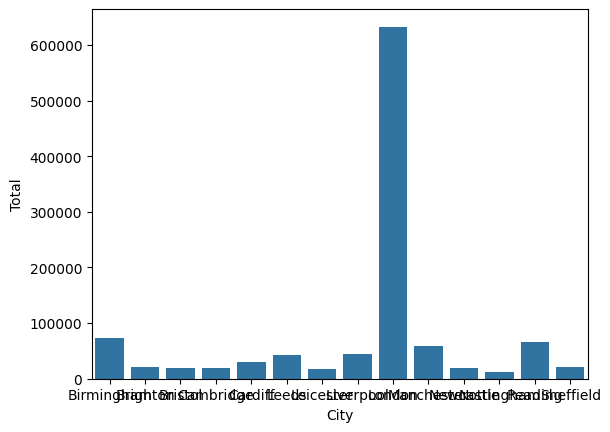

In [42]:
sns.barplot(data=passengers[(passengers['Direction'] == "Arrivals") & (passengers['Year'] == 2021)],
            x='City', y='Total')

It's not great though, because the city names overlap.  There are various things you might do to revise this plot, such as rotating the city names.  But maybe the easiest change is simply to swap the axes, like this:

<Axes: xlabel='Total', ylabel='City'>

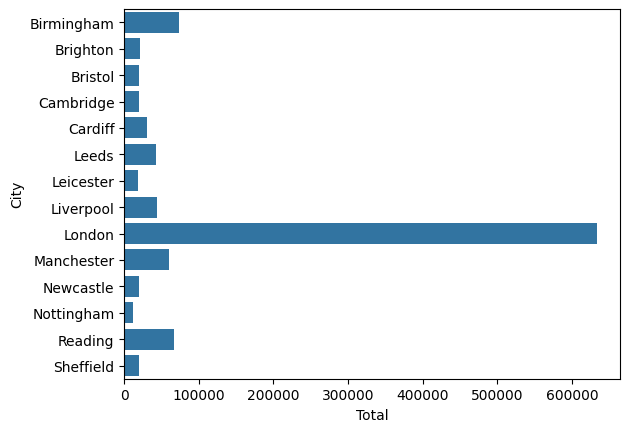

In [43]:
sns.barplot(data=passengers[(passengers['Direction'] == "Arrivals") & (passengers['Year'] == 2021)],
            x='Total', y='City')

Turns out, London is big.  Who knew? 🤷  So it's a bit unfortunate for our purposes, because we'd really like to know what's going on there in 2022 as far as passenger numbers, but the version of the data we have doesn't yet have that.

Reading is not far from London and is one of the next-largest destinations - but unfortunately our data for Reading only starts in 2017.  So let's go with Birmingham.

**EXERCISE**: How would you extract just the rows corresponding to arrivals at Birmingham?  Write an expression that selects the appropriate rows, and assigns the resulting DataFrame to the variable `birmingham`:

In [44]:
birmingham = passengers[(passengers['Direction'] == "Arrivals") & (passengers['City'] == "Birmingham")]
birmingham

,Year,Direction,City,Metric,start-06:59,07:00-07:59,08:00-08:59,09:00-09:59,10:00-10:59,11:00-11:59,...,15:00-15:59,16:00-16:59,17:00-17:59,18:00-18:59,19:00-19:59,20:00-20:59,21:00-21:59,22:00-22:59,23:00-end,Total
488,2021,Arrivals,Birmingham,Passengers,1669.666667,5862.809524,9929.615019,5793.45,4370.565385,4655.027692,...,4028.383333,5332.161905,5688.583333,4730.279121,3340.054986,2282.653221,1354.261905,1036.736364,1003.070588,73874.244042


We can see that numbers in Birmingham haven't fully recovered in 2022; in fact they're only back to 2012 or 2013 levels.  Of course, it's always nice to make a picture!  This is the job of Seaborn's `.lineplot()`:

<Axes: xlabel='Year', ylabel='Total'>

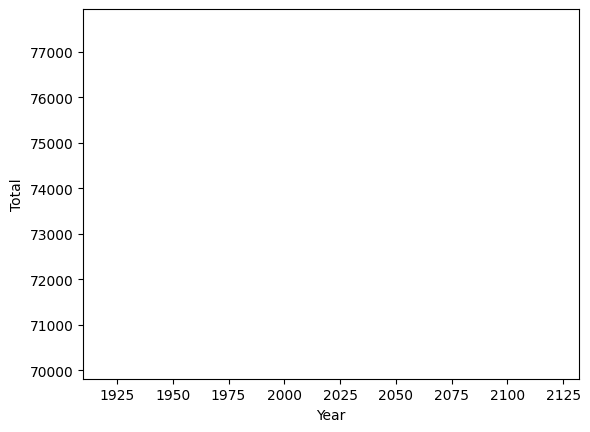

In [45]:
sns.lineplot(data=birmingham, x='Year', y='Total')

But while we're at it, why not look at all of the cities in one graph?  Seaborn makes this easy.  The parameter `hue` tells Seaborn to group the data by the specified column, and produce a different line (in a different colour) for each group.

<Axes: xlabel='Year', ylabel='Total'>

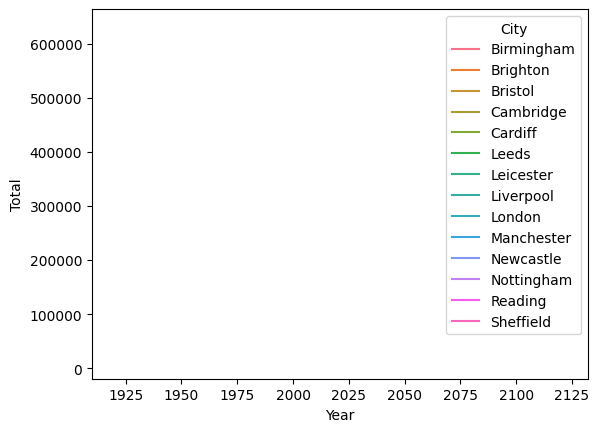

In [46]:
sns.lineplot(data=passengers[passengers['Direction'] == "Arrivals"], x='Year', y='Total', hue='City')

London's so much larger than other cities that it makes this graph not that edifying.  How can you change the above expression to remove London and look only at the other cities?

<Axes: xlabel='Year', ylabel='Total'>

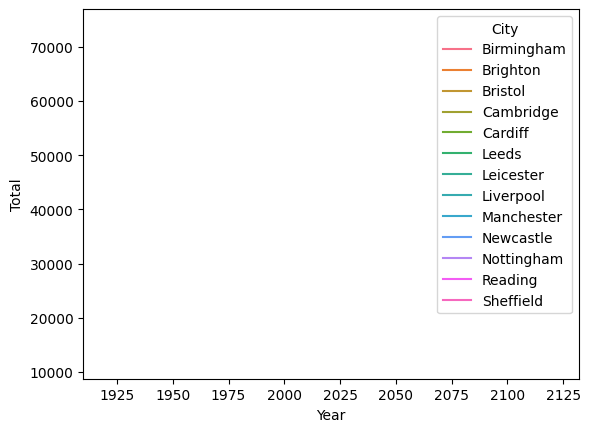

In [47]:
sns.lineplot(data=passengers[(passengers['Direction'] == "Arrivals") & (passengers['City'] != "London")],
             x='Year', y='Total', hue='City')

Seaborn often gives a great start at graphs, but it doesn't mean that the graph you get is always ready for your final report!  In this case, it's nice that Seaborn generates a legend, but not so nice that it puts the legend immediately over the part of the graph we care the most about.  In future weeks we'll learn more about customising graphs and visualisations.  But for now, what we really care about is knowing whether passenger numbers have recovered, and maybe not so much which city is which.  For that, we can just turn off the legend entirely by specifying `legend=False`:

<Axes: xlabel='Year', ylabel='Total'>

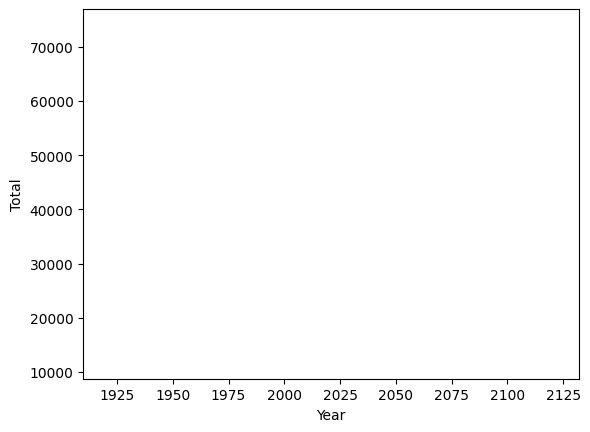

In [48]:
sns.lineplot(data=passengers[(passengers['Direction'] == "Arrivals") & (passengers['City'] != "London")],
             x='Year', y='Total', hue='City', legend=False)

We can see that indeed it does look like almost all cities are operating in 2022 at roughly at or below their 2012 levels.

For today, we'll take one last look - we will come back to this dataset more in the next few weeks!  Let's produce totals for passengers by year across the country, taking care to include only the cities for which we have a full 2011-2022 sample.

In [49]:
sample = passengers[~passengers['City'].isin(["London", "Brighton", "Cambridge", "Reading"])]
sample

,Year,Direction,City,Metric,start-06:59,07:00-07:59,08:00-08:59,09:00-09:59,10:00-10:59,11:00-11:59,...,15:00-15:59,16:00-16:59,17:00-17:59,18:00-18:59,19:00-19:59,20:00-20:59,21:00-21:59,22:00-22:59,23:00-end,Total
488,2021,Arrivals,Birmingham,Passengers,1669.666667,5862.809524,9929.615019,5793.450000,4370.565385,4655.027692,...,4028.383333,5332.161905,5688.583333,4730.279121,3340.054986,2282.653221,1354.261905,1036.736364,1003.070588,73874.244042
492,2021,Arrivals,Bristol,Passengers,322.365000,947.197114,2779.926288,1019.119841,1025.716162,1386.179829,...,1291.117244,1546.698138,1933.760714,909.502814,847.894017,772.802997,756.414015,288.099155,659.658333,19946.594985
496,2021,Arrivals,Cardiff,Passengers,1050.574908,1262.371429,2613.968487,1470.573810,1847.666941,1722.270647,...,2400.230245,2746.865476,2915.857937,2098.482143,1436.320746,1474.964977,1279.908333,645.383333,295.491667,30505.338926
498,2021,Arrivals,Leeds,Passengers,766.840784,3311.633514,6145.398468,3096.605448,3125.306942,2237.775464,...,2056.531356,2893.711060,2738.886989,2777.194112,1638.706380,1153.560607,1331.048731,425.410157,873.210107,42042.637330
500,2021,Arrivals,Leicester,Passengers,356.317771,663.549351,1501.854161,1157.171429,1215.106456,1333.464566,...,1084.285065,1284.565278,1363.259007,1456.605303,1024.282845,1252.533750,669.888751,656.772969,216.979167,18321.395408
502,2021,Arrivals,Liverpool,Passengers,1587.925122,4661.206487,6963.065075,3666.591813,2448.201604,2719.267585,...,2325.349485,2694.661432,2926.142282,2413.742559,1332.702386,1007.248351,778.339134,748.354879,840.444698,44287.082162
506,2021,Arrivals,Manchester,Passengers,1584.400176,4318.071366,7049.539898,4403.605495,3878.837741,3752.334537,...,4097.938445,4491.136713,4707.542387,3654.511866,1906.537677,1616.974025,1422.366287,953.013830,821.927104,59645.042405
508,2021,Arrivals,Newcastle,Passengers,0.000000,423.122313,861.160024,1196.073892,1053.054111,1374.343794,...,1231.607148,1359.703989,1408.345194,1071.474080,922.119090,1773.751368,1361.475294,906.568808,878.000000,20129.307540
510,2021,Arrivals,Nottingham,Passengers,255.823621,633.957303,958.447602,751.167857,920.084812,679.162200,...,707.216667,1049.232104,749.822009,1133.223317,458.612069,506.304497,135.875000,279.375128,214.788889,11849.693481
514,2021,Arrivals,Sheffield,Passengers,284.984746,1228.251216,1517.081632,1540.204577,1114.059169,1580.926979,...,1075.886682,1458.429829,1700.346289,1559.895546,1194.909776,634.829913,730.431712,379.808071,502.767157,20205.881241


We have 240 rows, which is what we expect.  We've taken a sample of the cities which have 12 years of data, and there are 11 such cities, and there's both arrivals and departures data, so that's 12 * 11 * 2 = 240 rows.  How would we compute total arrivals by year across these cities?  We want to group by the year, and then `.sum()` takes the total within each group:

In [50]:
sample[sample['Direction'] == "Arrivals"].groupby('Year')['Total'].sum()

Year
2021    340807.21752
Name: Total, dtype: float64

Because what we've produced above is a Series, we can just pass it directly to Seaborn's `.lineplot()` without any further arguments:

<Axes: xlabel='Year', ylabel='Total'>

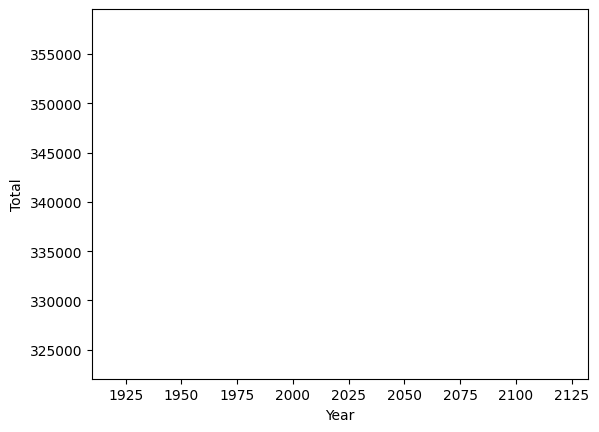

In [51]:
sns.lineplot(data=sample[sample['Direction'] == "Arrivals"].groupby('Year')['Total'].sum())

# Taking stock

This week has been a quick tour that has introduced you to the concept of a DataFrame, and given you a taste of how to work with and visualise data in DataFrames using Python, principally focusing on the `pandas` and `seaborn` packages.

You should reflect on how you feel about your level of comfort and understanding of what we've covered.  Without wanting to influence your thinking unduly, you probably feel some mixture of
#. Excitement that it's possible to work with data without writing a lot of code
#. Overwhelm because there are so many different function calls and operations - and how can you know them all?

If you feel this way - and especially on the second point - this is normal and OK!  Remember that on this module our philosophy is to get you writing code quickly, and get you seeing results of writing code quickly.  That is what we've accomplished today.

In the weeks to come, we will break down these libraries in more detail and explore more systematically their capabilities.